In [71]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt

In [127]:
length_range = range(10,220,20)
weights = np.random.rand(220)
values = np.random.rand(220)

In [128]:
len(values)

220

In [5]:
sa_dict = {}
rhc_dict = {}
ga_dict = {}
minic_dict = {}

In [6]:
def knapsack_length(length):
    
    fitness = mlrose.Knapsack(weights[:length], values[:length], 0.65)
    problem = mlrose.DiscreteOpt(length = length,
                                 fitness_fn = fitness,
                                 maximize = True,
                                 max_val = 2)
    problem.set_mimic_fast_mode(True)
    
    #--------------------------------Simulated Annealing------------------------------------------------
    _,sa_fitness,_ = mlrose.simulated_annealing(problem,
                                                schedule = mlrose.ExpDecay(),
                                                max_attempts = 100,
                                                max_iters = 1000,
                                                init_state = np.random.randint(2, size = length),
                                                curve = True)
    sa_dict[length] = sa_fitness

    #----------------------------------Randomized Hill Climbing------------------------------------------------

    _,rhc_fitness, _ = mlrose.random_hill_climb(problem,
                                                max_attempts = 100,
                                                max_iters = 1000,
                                                init_state = np.random.randint(2, size = length),
                                                curve = True)
    rhc_dict[length] = rhc_fitness
    
    #-------------------------------------Genetic Algorithm------------------------------------------------

    _,ga_fitness, _ = mlrose.genetic_alg(problem,
                                         max_attempts = 100,
                                         max_iters = 1000,
                                         curve = True)
    ga_dict[length] = ga_fitness
    
    #----------------------------------------MIMIC------------------------------------------------

    _,mimic_fitness, _ = mlrose.mimic(problem,
                                      max_attempts = 100,
                                      max_iters = 1000,
                                      curve = True)
    minic_dict[length] = mimic_fitness

def plot_lenght_graphs(plt,sa_dict,rhc_dict,ga_dict,minic_dict):

    plt.plot(rhc_dict.keys(),
             rhc_dict.values(),
             label = 'Randomized Hill Climb')
    plt.plot(sa_dict.keys(),
             sa_dict.values(),
             label = 'Simulated Annealing')
    plt.plot(ga_dict.keys(),
             ga_dict.values(),
             label = 'Genetic Algorithm')
    plt.plot(minic_dict.keys(),
             minic_dict.values(),
             label = 'MIMIC')
    plt.title('Fitness VS Problem Size (Knapsack)')
    plt.xlabel('Problem Size')
    plt.ylabel('Fitness')
    plt.legend()
    
def knapsack_iterations(problem_length):
    
    fitness = mlrose.Knapsack(weights[:problem_length], values[:problem_length], 0.65)
    
    problem = mlrose.DiscreteOpt(length = problem_length,
                                 fitness_fn = fitness,
                                 maximize = True,
                                 max_val = 2)
    problem.set_mimic_fast_mode(True)
    init_state = np.random.randint(2, size = problem_length)
    
    _, _, rhc_fitness_curve = mlrose.random_hill_climb(problem,
                                                       max_attempts = 100,
                                                       max_iters = 2000,
                                                       init_state = init_state,
                                                       curve = True)
    _, _, sa_fitness_curve = mlrose.simulated_annealing(problem,
                                                        schedule = mlrose.ExpDecay(),
                                                        max_attempts = 100,
                                                        max_iters = 2000,
                                                        init_state = init_state,
                                                        curve = True)

    _, _, ga_fitness_curve = mlrose.genetic_alg(problem,
                                                max_attempts = 100,
                                                max_iters = 2000,
                                                curve = True)

    _, _, mimic_fitness_curve = mlrose.mimic(problem,
                                             max_attempts = 100,
                                             max_iters = 2000,
                                             curve = True)
    
    return rhc_fitness_curve,sa_fitness_curve,ga_fitness_curve,mimic_fitness_curve

def rhc_optimization(problem_length,restart_list):
    li =[]
    fitness = mlrose.Knapsack(weights[:problem_length], values[:problem_length], 0.65)

    problem = mlrose.DiscreteOpt(length = problem_length,
                                   fitness_fn = fitness,
                                   maximize = True,
                                   max_val = 2)
    for restart_value in restart_list:
        _, _, rhc_fitness_curve = mlrose.random_hill_climb(problem,
                                                           restarts = restart_value,
                                                           max_attempts = 100,
                                                           max_iters = 2000,
                                                           init_state = np.random.randint(2, size = problem_length),
                                                           curve = True)
        li.append(rhc_fitness_curve)
    
    return li

def sa_optimization(problem_length,schedule_list):
    li = []
    fitness = mlrose.Knapsack(weights[:problem_length], values[:problem_length], 0.65)

    problem = mlrose.DiscreteOpt(length = problem_length,
                                 fitness_fn = fitness,
                                 maximize = True,
                                 max_val = 2)
    
    for schedule in schedule_list:
    
        _, _, sa_fitness_curve = mlrose.simulated_annealing(problem,
                                                            schedule = schedule,
                                                            max_attempts = 100,
                                                            max_iters = 2000,
                                                            init_state = np.random.randint(2, size = problem_length),
                                                            curve = True)
        li.append(rhc_fitness_curve)
    
    return li

def ga_optimization(problem_length,hyperparam_list):
    li = []
    fitness = mlrose.Knapsack(weights[:problem_length], values[:problem_length], 0.65)

    problem = mlrose.DiscreteOpt(length = problem_length,
                                 fitness_fn = fitness,
                                 maximize = True,
                                 max_val = 2)
    
    for i in hyperparam_list:
    
        _, _, ga_fitness_curve = mlrose.genetic_alg(problem,
                                                    mutation_prob = i[0],
                                                    pop_size = i[1],
                                                    max_attempts = 100,
                                                    curve = True)
        li.append(ga_fitness_curve)
    
    return li

def mimic_optimization(problem_length,hyperparam_list):
    li = []
    fitness = mlrose.Knapsack(weights[:problem_length], values[:problem_length], 0.65)

    problem = mlrose.DiscreteOpt(length = problem_length,
                                 fitness_fn = fitness,
                                 maximize = True,
                                 max_val = 2)
    
    for i in hyperparam_list:
        
        _, _, mimic_fitness_curve = mlrose.mimic(problem,
                                                 keep_pct = i[0],
                                                 max_iters = 100,
                                                 pop_size = i[1],
                                                 max_attempts = 10,
                                                 curve = True)
        li.append(mimic_fitness_curve)
    
    return li


In [7]:
for i in length_range:
    knapsack_length(i)

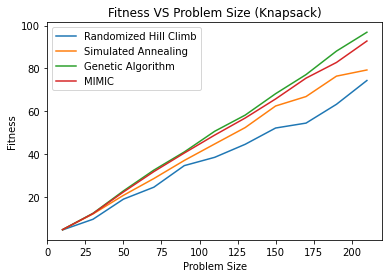

In [9]:
plot_lenght_graphs(plt,sa_dict,rhc_dict,ga_dict,minic_dict)

In [85]:
rhc_fitness_curve,sa_fitness_curve,ga_fitness_curve,mimic_fitness_curve = knapsack_iterations(75)

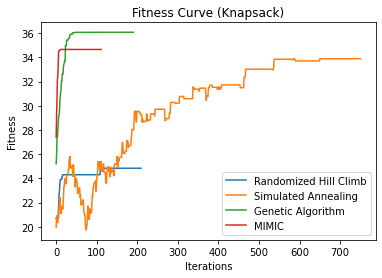

In [86]:
plt.figure()
plt.plot(rhc_fitness_curve[:,0],
         label = 'Randomized Hill Climb')
plt.plot(sa_fitness_curve[:,0],
         label = 'Simulated Annealing')
plt.plot(ga_fitness_curve[:,0],
         label = 'Genetic Algorithm')
plt.plot(mimic_fitness_curve[:,0],
         label = 'MIMIC')
plt.title('Fitness Curve (Knapsack)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

In [87]:
problem_lenght = 75
restarts_list = [0,2,4,6,8,10]
rhc_restarts_curves = rhc_optimization(problem_lenght,restarts_list)

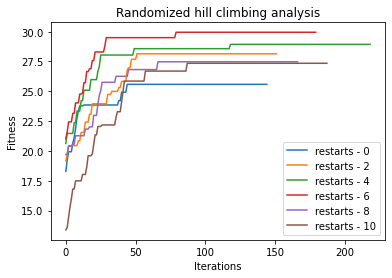

In [88]:
plt.figure()
plt.plot(rhc_restarts_curves[0][:,0],
         label = 'restarts - 0')
plt.plot(rhc_restarts_curves[1][:,0],
         label = 'restarts - 2')
plt.plot(rhc_restarts_curves[2][:,0], 
         label = 'restarts - 4')
plt.plot(rhc_restarts_curves[3][:,0], 
         label = 'restarts - 6')
plt.plot(rhc_restarts_curves[4][:,0], 
         label = 'restarts - 8')
plt.plot(rhc_restarts_curves[5][:,0], 
         label = 'restarts - 10')
plt.title('Randomized hill climbing analysis')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

In [89]:
problem_length = 75
schedule_list = [mlrose.ExpDecay(),mlrose.GeomDecay(),mlrose.ArithDecay()]
sa_schedules_curves = sa_optimization(problem_length,schedule_list)

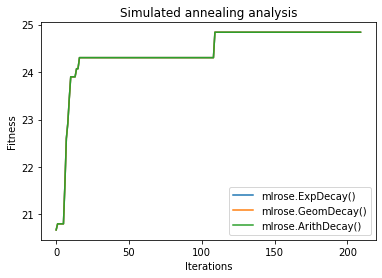

In [90]:
plt.figure()
plt.plot(sa_schedules_curves[0][:,0], 
         label = 'mlrose.ExpDecay()')
plt.plot(sa_schedules_curves[1][:,0], 
         label = 'mlrose.GeomDecay()')
plt.plot(sa_schedules_curves[2][:,0], 
         label = 'mlrose.ArithDecay()')

plt.title('Simulated annealing analysis')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

In [91]:
problem_length = 75
hyperparam_list = [[0.1,100],[0.3,100],[0.5,100],[0.1,150],[0.3,150],[0.5,150],[0.1,200],[0.3,200],[0.5,200]]
ga_popsize_curves = ga_optimization(problem_length,hyperparam_list)

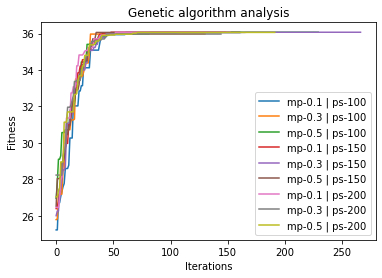

In [92]:
plt.figure()
plt.plot(ga_popsize_curves[0][:,0], 
         label = 'mp-0.1 | ps-100')
plt.plot(ga_popsize_curves[1][:,0], 
         label = 'mp-0.3 | ps-100')
plt.plot(ga_popsize_curves[2][:,0], 
         label = 'mp-0.5 | ps-100')
plt.plot(ga_popsize_curves[3][:,0], 
         label = 'mp-0.1 | ps-150')
plt.plot(ga_popsize_curves[4][:,0], 
         label = 'mp-0.3 | ps-150')
plt.plot(ga_popsize_curves[5][:,0], 
         label = 'mp-0.5 | ps-150')
plt.plot(ga_popsize_curves[6][:,0], 
         label = 'mp-0.1 | ps-200')
plt.plot(ga_popsize_curves[7][:,0], 
         label = 'mp-0.3 | ps-200')
plt.plot(ga_popsize_curves[8][:,0], 
         label = 'mp-0.5 | ps-200')

plt.title('Genetic algorithm analysis')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

In [93]:
problem_length = 75
hyperparam_list = [[0.2,100],[0.4,100],[0.2,150],[0.4,150],[0.2,200],[0.4,200]]
mimic_popsize_curves = mimic_optimization(problem_length,hyperparam_list)

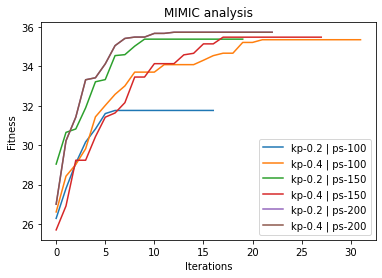

In [94]:
plt.figure()
plt.plot(mimic_popsize_curves[0][:,0], 
         label = 'kp-0.2 | ps-100')
plt.plot(mimic_popsize_curves[1][:,0], 
         label = 'kp-0.4 | ps-100')
plt.plot(mimic_popsize_curves[2][:,0], 
         label = 'kp-0.2 | ps-150')
plt.plot(mimic_popsize_curves[3][:,0], 
         label = 'kp-0.4 | ps-150')
plt.plot(mimic_popsize_curves[4][:,0], 
         label = 'kp-0.2 | ps-200')
plt.plot(mimic_popsize_curves[4][:,0], 
         label = 'kp-0.4 | ps-200')

plt.title('MIMIC analysis')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

In [132]:
def final_optimized(problem_length):
    
    time_dict = {}

    fitness = mlrose.Knapsack(weights[:problem_length], values[:problem_length], 0.65)
    problem = mlrose.DiscreteOpt(length = problem_length,
                                 fitness_fn = fitness,
                                 maximize = True,
                                 max_val = 2)
    problem.set_mimic_fast_mode(True)
    
    #--------------------------------Simulated Annealing------------------------------------------------

    start = time.time()
    _,_,sa_curve= mlrose.simulated_annealing(problem,
                                             schedule = mlrose.ExpDecay(),
                                             max_attempts = 100,
                                             max_iters = 1000,
                                             init_state = np.random.randint(2, size = problem_length),
                                             curve = True)
    end = time.time()
    
    time_dict['SA'] = end - start

    #----------------------------------Randomized Hill Climbing------------------------------------------------
    
    start = time.time()
    
    _,_,rhc_curve= mlrose.random_hill_climb(problem,
                                            restarts = 6,
                                            max_attempts = 100,
                                            max_iters = 1000,
                                            init_state = np.random.randint(2, size = problem_length),
                                            curve = True)
    end = time.time()
    
    time_dict['RHC'] = end - start
    #-------------------------------------Genetic Algorithm------------------------------------------------

    start = time.time()
    _,_,ga_curve = mlrose.genetic_alg(problem,
                                      mutation_prob = 0.3,
                                      pop_size = 150,
                                      max_attempts = 100,
                                      max_iters = 1000,
                                      curve = True)

    end = time.time()
    
    time_dict['GA'] = end - start
    
    #----------------------------------------MIMIC------------------------------------------------
    start = time.time()
    
    _,_,mimic_curve = mlrose.mimic(problem,
                                   keep_pct = 0.4,
                                   pop_size = 250,
                                   max_attempts = 100,
                                   max_iters = 1000,
                                   curve = True)

    end = time.time()

    time_dict['MIMIC'] = end - start
    return sa_curve,rhc_curve,ga_curve,mimic_curve,time_dict

In [136]:
sa_final,rhc_final,ga_final,mimic_final,time_dict = final_optimized(75)

In [137]:
time_dict

{'SA': 0.11876893043518066,
 'RHC': 0.0784599781036377,
 'GA': 7.045318365097046,
 'MIMIC': 18.064415216445923}

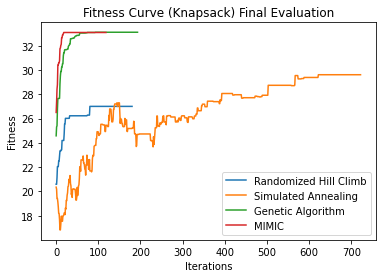

In [138]:
plt.figure()
plt.plot(rhc_final[:,0], label = 'Randomized Hill Climb')
plt.plot(sa_final[:,0], label = 'Simulated Annealing')
plt.plot(ga_final[:,0], label = 'Genetic Algorithm')
plt.plot(mimic_final[:,0], label = 'MIMIC')
plt.title('Fitness Curve (Knapsack) Final Evaluation')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

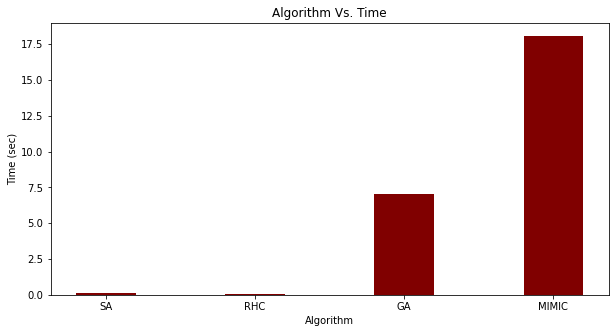

In [139]:

names = list(time_dict.keys())
values = list(time_dict.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(names,
        values,
        color ='maroon',
        width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("Time (sec)")
plt.title("Algorithm Vs. Time")
plt.show()